In [1]:
# Created By Joseph Chancey
# People Analytics | Work Absenteeism

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("../Data/MFGEmployees4.csv")

In [4]:
df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [5]:
df.count()

EmployeeNumber    8336
Surname           8336
GivenName         8336
Gender            8336
City              8336
JobTitle          8336
DepartmentName    8336
StoreLocation     8336
Division          8336
Age               8336
LengthService     8336
AbsentHours       8336
BusinessUnit      8336
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


In [7]:
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


In [8]:
df.corr()

,EmployeeNumber,Age,LengthService,AbsentHours
EmployeeNumber,1.000000,-0.018445,-0.119631,0.007418
Age,-0.018445,1.000000,0.053104,0.830234
LengthService,-0.119631,0.053104,1.000000,-0.044202
AbsentHours,0.007418,0.830234,-0.044202,1.000000


In [9]:
df.columns

Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService',
       'AbsentHours', 'BusinessUnit'],
      dtype='object')

<AxesSubplot:title={'center':'Age vs. Absent Hours'}, xlabel='AbsentHours', ylabel='Age'>

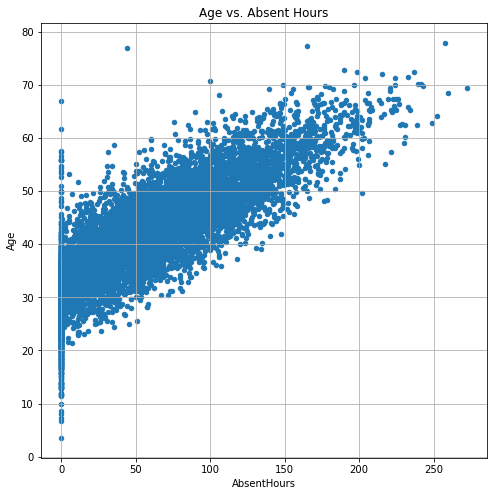

In [10]:
df.plot(kind="scatter", x="AbsentHours", y="Age", grid=True, figsize=(8,8), title="Age vs. Absent Hours")